In [2]:
from sklearn import datasets as ds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
### Creatign data which has 4 clusters

In [4]:
X, y = ds.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                              n_classes=4, n_clusters_per_class=1,class_sep=3.0, )

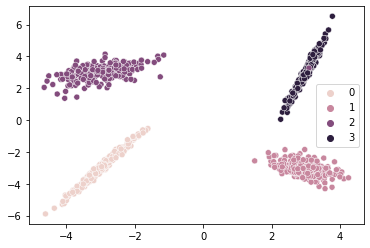

In [5]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

## K Means clusterign class

In [107]:

class K_Means():
    
    def __init__(self, k):
    
        ## number clusters
        self.k = k   
        ##iterations
        self.iterations = None
        ## Campture cluster centroid hostory
        self.history_centroids = []
        self.history_varience = []
        ## Initializie random cluster centroids
        
    def plotKMeans(self, X, plot_size = (18,6), save_path=None):
        """ Works only data is 2 dimensional """
        Xmin, Xmax, Ymin, Ymax = X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()
        history_centroid_array = np.reshape(self.history_centroids, (self.iterations * self.k,self.history_centroids.shape[-1]))
        iter_index = [i+1 for i in range(iterations) for _ in range(k)]
        cluster_index = list(range(k)) * iterations
        cluster_index = ["C" + str(c+1) for c in cluster_index]
        
        
        ## Plot 
        
        plt.figure(figsize=plot_size)
        plt.subplot(1,2,1)
        sns.scatterplot(x=X[:,0], y=X[:,1])
        #plt.legend(title="cluster")

        plt.subplot(1,2,2)
                
        sns.scatterplot(x=history_centroid_array[:,0], y=history_centroid_array[:,1], 
                        hue=iter_index, s=300, alpha=0.7, style=cluster_index )
        plt.xlim([Xmin, Xmax])
        plt.ylim([Ymin, Ymax])
        #plt.legend(title="iter & cluster")
        
        if save_path is not None: plt.savefig(save_path)
        plt.show()
        
        
        
    
    def fit(self, X, ierations=5):
        
        self.iterations = ierations
        centroids = []
        for c in range(self.k):
            centroid = []
            for i in range(X.shape[1]):
                p = random.uniform(X[:,i].min(), X[:,i].max())
                centroid.append(p)
            centroids.append(centroid)

        for _ in range(ierations):

            ## Preparing for matrix operation
            centroids = np.array(centroids)
            centroids = np.reshape(centroids, (centroids.shape[0], 1, centroids.shape[1]))

            ## Assign each point to closest cluster based on Euclidean distsnace

            # Euclidiean distance
            dist = np.sum(np.square(X - centroids), axis=2)

            #based on distance reassign the clusters
            self.new_clusters = np.argmin(dist, axis=0)


            self.history_centroids.append(centroids) # centroids for each iteration

            ## Compute the cluster variances also new centroids

            centroids = []
            cluster_variances = []
            for c in range(k): ## for each cluster
                cluster = X[self.new_clusters == c]
                mean = np.mean(cluster, axis=0)
                sum_diffs =  np.sum(np.square(cluster - mean), axis=0)
                #avg_diffs = 1/diffs.shape[0] * np.sum(diffs, axis=0)
                variance = 1/cluster.shape[0] * np.sum(sum_diffs)
                cluster_variances.append(variance)
                centroids.append(mean.tolist())


            self.history_varience.append(cluster_variances) # variane of each cluster for each iteration
            
        self.history_centroids = np.reshape(np.array(self.history_centroids), [ierations, self.k, X.shape[-1]])
        return self.new_clusters, self.history_centroids, self.history_varience


In [108]:
k = 4
iterations=10
kmeans  = K_Means(k)
new_clusters, history_centroids, history_varience = kmeans.fit(X, iterations)

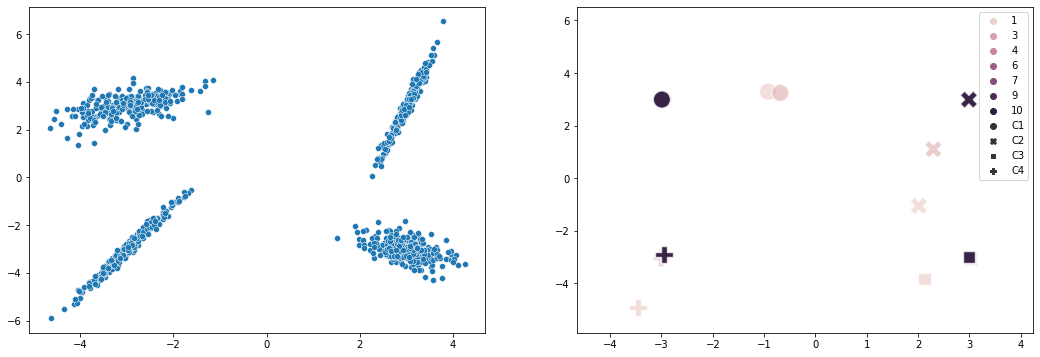

In [109]:
kmeans.plotKMeans(X, save_path = "kmeans_clusters.svg")